In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
%matplotlib inline
from selenium import webdriver
from selenium.webdriver.common.by import By
from pprint import pprint

In [123]:
import json
df=pd.read_json("dataset_instagram-api-scraper_2023-05-29_11-54-31-918.json")
df.head(6)

,hashtags,likesCount,commentsCount,highlightReelCount,igtvVideoCount,caption,type,postsCount,timestamp,followsCount,followersCount,videoViewCount,productType,videoPlayCount
0,[],507,16,14,6686,اللجنة الوطنية للانتخابات تنشر قوائم الهيئات ا...,Image,103372,2015-07-05 15:32:34+00:00,15,2566997,NaN,NaN,NaN
1,[],658,13,14,6686,.\nكل أسبوع خلال أيام عروض الشارقة للتسوق نك...,Video,103372,2020-08-08 11:30:01+00:00,15,2566997,11053.0,feed,NaN
2,"[Repost, الإمارات]",493,9,14,6686,#Repost @uae_barq with @repostapp. ・・・ 👆👆موقع ...,Image,103372,2014-12-18 11:31:17+00:00,15,2566997,NaN,NaN,NaN
3,[],413,1,14,6686,تحتفل الإمارات ب «يوم المرأة» بدورته الأولى في...,Image,103372,2015-08-28 09:16:29+00:00,15,2566997,NaN,NaN,NaN
4,[],438,25,14,6686,‏لا اله إلا الله وحده لا شريك له . له الحمد ول...,Image,103372,2014-08-07 21:51:40+00:00,15,2566997,NaN,NaN,NaN
5,"[أحب_محمد_بن_زايد, تويتر, الآن, من, أبناء, الو...",628,8,14,6686,#أحب_محمد_بن_زايد \nوسم فعال في #تويتر ❤️\n#ال...,Image,103372,2015-08-25 16:03:59+00:00,15,2566997,NaN,NaN,NaN


In [124]:
df.describe()

,likesCount,commentsCount,highlightReelCount,igtvVideoCount,postsCount,followsCount,followersCount,videoViewCount,videoPlayCount
count,191.000000,191.000000,191.0,191.0,191.0,191.0,191.0,2.000000,0.0
mean,206.157068,10.052356,14.0,6686.0,103372.0,15.0,2566997.0,9102.500000,NaN
std,230.399462,27.675134,0.0,0.0,0.0,0.0,0.0,2758.423553,NaN
min,4.000000,0.000000,14.0,6686.0,103372.0,15.0,2566997.0,7152.000000,NaN
25%,38.000000,1.000000,14.0,6686.0,103372.0,15.0,2566997.0,8127.250000,NaN
50%,112.000000,3.000000,14.0,6686.0,103372.0,15.0,2566997.0,9102.500000,NaN
75%,330.500000,7.000000,14.0,6686.0,103372.0,15.0,2566997.0,10077.750000,NaN
max,1044.000000,206.000000,14.0,6686.0,103372.0,15.0,2566997.0,11053.000000,NaN


In [125]:
df.dtypes

hashtags                           object
likesCount                          int64
commentsCount                       int64
highlightReelCount                  int64
igtvVideoCount                      int64
caption                            object
type                               object
postsCount                          int64
timestamp             datetime64[ns, UTC]
followsCount                        int64
followersCount                      int64
videoViewCount                    float64
productType                        object
videoPlayCount                    float64
dtype: object

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   hashtags            191 non-null    object             
 1   likesCount          191 non-null    int64              
 2   commentsCount       191 non-null    int64              
 3   highlightReelCount  191 non-null    int64              
 4   igtvVideoCount      191 non-null    int64              
 5   caption             191 non-null    object             
 6   type                191 non-null    object             
 7   postsCount          191 non-null    int64              
 8   timestamp           191 non-null    datetime64[ns, UTC]
 9   followsCount        191 non-null    int64              
 10  followersCount      191 non-null    int64              
 11  videoViewCount      2 non-null      float64            
 12  productType         2 non-null      

In [127]:
df.isnull().sum()

hashtags                0
likesCount              0
commentsCount           0
highlightReelCount      0
igtvVideoCount          0
caption                 0
type                    0
postsCount              0
timestamp               0
followsCount            0
followersCount          0
videoViewCount        189
productType           189
videoPlayCount        191
dtype: int64

In [128]:
df.fillna(df.mode(), inplace=True)

In [129]:
data = df.dropna()

In [130]:
df.drop(['videoPlayCount', 'productType'], axis=1, inplace=True)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   hashtags            191 non-null    object             
 1   likesCount          191 non-null    int64              
 2   commentsCount       191 non-null    int64              
 3   highlightReelCount  191 non-null    int64              
 4   igtvVideoCount      191 non-null    int64              
 5   caption             191 non-null    object             
 6   type                191 non-null    object             
 7   postsCount          191 non-null    int64              
 8   timestamp           191 non-null    datetime64[ns, UTC]
 9   followsCount        191 non-null    int64              
 10  followersCount      191 non-null    int64              
 11  videoViewCount      3 non-null      float64            
dtypes: datetime64[ns, UTC](1), float64(1

# Distribution of videoViewCount

In [132]:
# separate the timestamp column into individual columns
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

In [133]:
df.dtypes

hashtags                           object
likesCount                          int64
commentsCount                       int64
highlightReelCount                  int64
igtvVideoCount                      int64
caption                            object
type                               object
postsCount                          int64
timestamp             datetime64[ns, UTC]
followsCount                        int64
followersCount                      int64
videoViewCount                    float64
year                                int64
month                               int64
day                                 int64
hour                                int64
minute                              int64
second                              int64
dtype: object

C:\Users\Figo\AppData\Local\Temp\ipykernel_5476\228143262.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




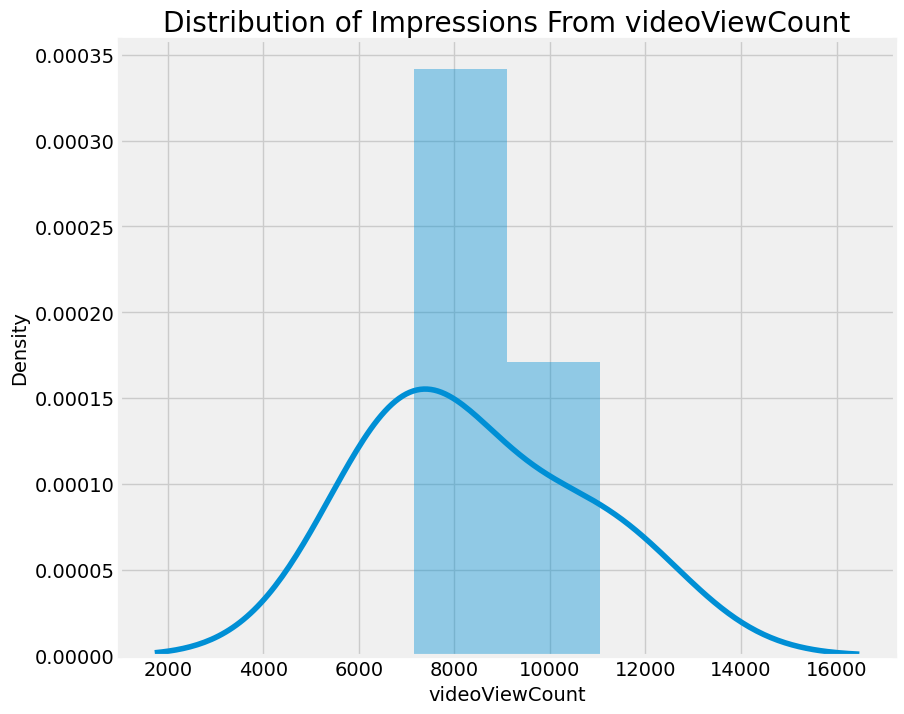

In [134]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From videoViewCount")
sns.distplot(df['videoViewCount'])
plt.show()

# Distribution of likesCount

C:\Users\Figo\AppData\Local\Temp\ipykernel_5476\185601827.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




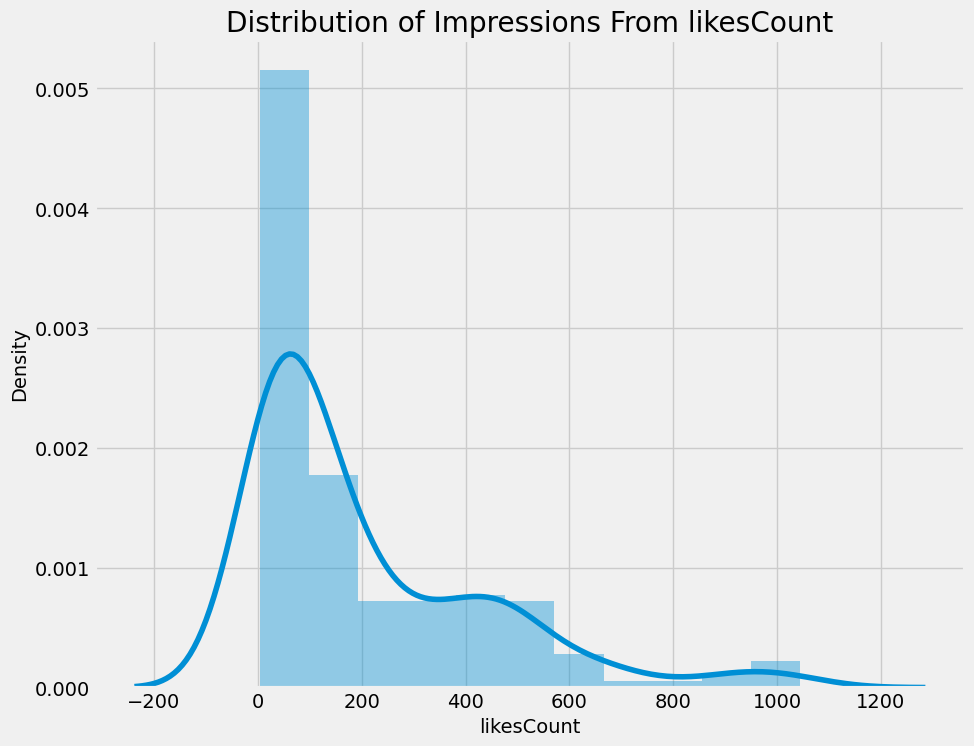

In [135]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From likesCount")
sns.distplot(df['likesCount'])
plt.show()

# Distribution of commentsCount

C:\Users\Figo\AppData\Local\Temp\ipykernel_5476\1886878830.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




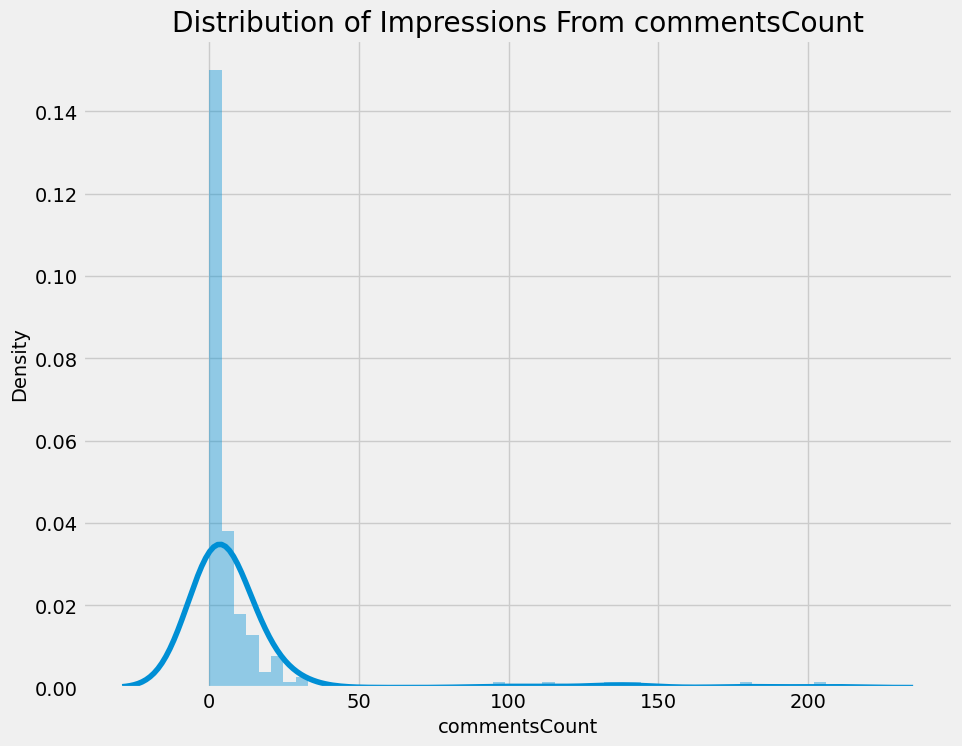

In [136]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From commentsCount")
sns.distplot(df['commentsCount'])
plt.show()

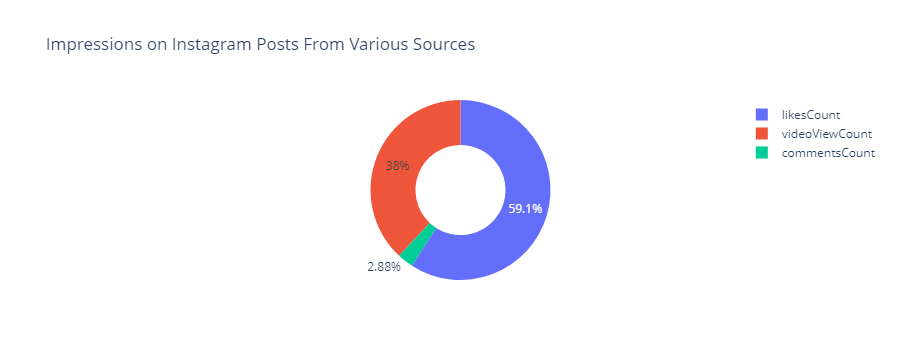

In [137]:
like = df["likesCount"].sum()
comments = df["commentsCount"].sum()
Videos = df['videoViewCount'].sum()

labels = ['likesCount','commentsCount','videoViewCount']
values = [like, comments,Videos]


fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

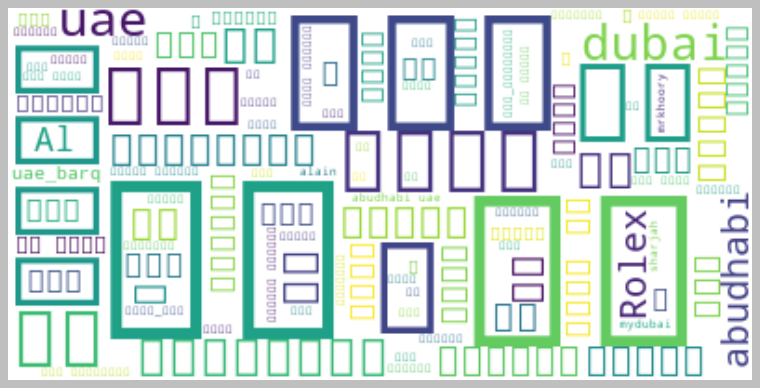

In [138]:
text = " ".join(i for i in df.caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
figure = px.scatter(data_frame = df, x="commentsCount",
                    y="likesCount", size="likesCount", trendline="ols", 
                    title = "Relationship Between Likes and Comments")
figure.show()

In [ ]:
figure = px.scatter(data_frame = df, x="videoViewCount",
                    y="likesCount", size="likesCount", trendline="ols", 
                    title = "Relationship Between Likes and videoViewCount")
figure.show()

In [ ]:
figure = px.scatter(data_frame = df, x="videoViewCount",
                    y="commentsCount", size="commentsCount", trendline="ols", 
                    title = "Relationship Between commentsCount and videoViewCount")
figure.show()


# Using Random Forest Regressor Model, which give more efficient results, with Ensemble R^2 Score: 0.99

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Generate a regression dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=0.5, random_state=42)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the individual regression models
lr = LinearRegression()
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

In [ ]:
# Create the ensemble model
ensemble = VotingRegressor(estimators=[('lr', lr), ('svr', svr), ('rf', rf)])
# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)
# Make predictions on the test set
y_pred = ensemble.predict(X_test)

# Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model:

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics for the ensemble model
print('Ensemble MSE:', mse)
print('Ensemble MAE:', mae)
print('Ensemble R^2 Score:', r2)

In [ ]:
# Plotting the predictions vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Ensemble Model: Predicted vs. True Values')
plt.show()

In [ ]:
import plotly.express as px
# Create a scatter plot of the predicted versus actual values
fig = px.scatter(x=y_test, y=y_pred)
fig.update_layout(
    xaxis_title='True Values',
    yaxis_title='Predicted Values',
    title='Ensemble Model: Predicted vs. True Values'
)
fig.show()

In [ ]:
df.head(2)

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
# Define a dictionary to map 'image' and 'video' to numerical values
#media_map = {'Image': 0, 'Video': 1}

# Map 'image' and 'video' variables to numerical values
#df['type'] = df['type'].map(media_map)

In [ ]:
import plotly.express as px
# plotting the histogram
fig = px.histogram(df, x="likesCount", color='type',
                   nbins=50, histnorm='percent',
                   barmode='overlay')
 
# showing the plot
fig.show()

In [ ]:
fig = px.pie(df, values="likesCount", names="month")
fig.show()

In [ ]:
fig = px.pie(df, values="commentsCount", names="year",
             color_discrete_sequence=px.colors.sequential.RdBu,
             opacity=0.7, hole=0.5)
fig.show()

In [ ]:
# plotting the violin plot
fig = px.violin(df, x="day", y="likesCount")
 
# showing the plot
fig.show()

#Violin Plot

In [ ]:
# plotting the violin plot
fig = px.violin(df, x="day", y="likesCount", color='type',
                   box=True)
 
# showing the plot
fig.show()

In [ ]:
# plotting the figure
fig = px.scatter_3d(df, x="commentsCount", y="type", z="likesCount")
 
fig.show()

In [ ]:
import plotly.graph_objects as px

#Adding interaction to the plot

In [ ]:
plot = px.Figure(data=[px.Scatter(
    x=df['day'],
    y=df['commentsCount'],
    mode='markers',)
])
 
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(buttons=list([
            dict(
                args=["type", "scatter"],
                label="Scatter Plot",
                method="restyle"
            ),
            dict(
                args=["type", "bar"],
                label="Bar Chart",
                method="restyle"
            )
        ]),
            direction="down",
        ),
    ]
)
 
plot.show()

In [ ]:
plot = px.Figure(data=[px.Scatter(
    x=data['type'],
    y=data['year'],
    mode='markers',)
])
 
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
        ),
    ]
)
 
plot.show()

In [ ]:
x = df['day']
y = df['commentsCount']
 
plot = px.Figure(data=[px.Scatter(
    x=x,
    y=y,
    mode='markers',)
])
 
plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    step="day",
                    stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)
 
plot.show()

In [ ]:
x = df['likesCount']
y = df['second']
 
plot = px.Figure(data=[px.Scatter(
    x=x,
    y=y,
    mode='markers',)
])
 
plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    step="day",
                    stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)
 
plot.show()